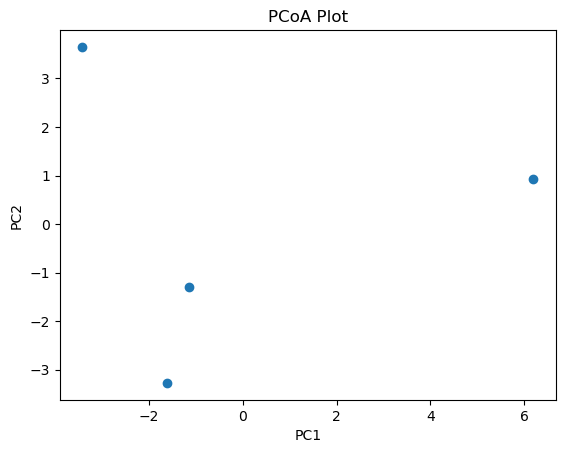

In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Example distance matrix (this should be a square matrix where distance[i, j] represents the distance between points i and j)
distance_matrix = np.array([[0, 2, 3, 4],
                           [2, 0, 5, 6],
                           [3, 5, 0, 7],
                           [4, 6, 7, 0]])

# Perform PCA on the distance matrix
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
pcoa_result = pca.fit_transform(distance_matrix)

# Plot the results
plt.scatter(pcoa_result[:, 0], pcoa_result[:, 1])
plt.title('PCoA Plot')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


C:\Users\newblearbomb\anaconda3\Lib\site-packages\skbio\stats\ordination\_principal_coordinate_analysis.py:214: RuntimeWarning: The result contains negative eigenvalues that are large in magnitude, which may suggest result inaccuracy. See Notes for details. The negative-most eigenvalue is -1.9918181816212948 whereas the largest positive one is 25.32125291992093.
  warn(


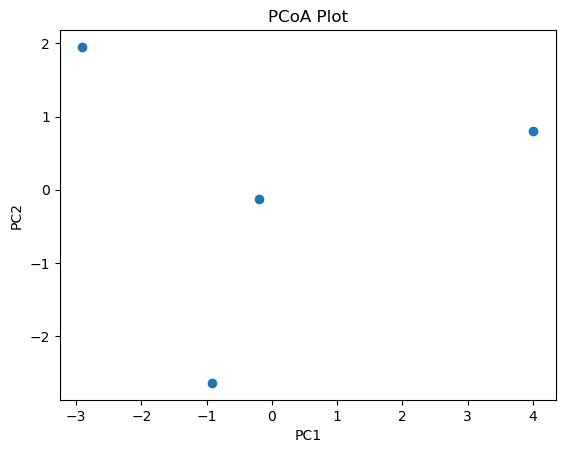

In [2]:
from skbio.stats.ordination import pcoa
import numpy as np
import matplotlib.pyplot as plt

# Example distance matrix
distance_matrix = np.array([[0, 2, 3, 4],
                            [2, 0, 5, 6],
                            [3, 5, 0, 7],
                            [4, 6, 7, 0]])

# Perform PCoA using the distance matrix
pcoa_results = pcoa(distance_matrix)

# Access the principal coordinates
coordinates = pcoa_results.samples

# Plot the results
plt.scatter(coordinates.iloc[:, 0], coordinates.iloc[:, 1])
plt.title('PCoA Plot')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


   Feature1  Feature2  Feature3
0         1         5         2
1         2         4         3
2        80         3         4
3         4         1         1
4         9         3         5


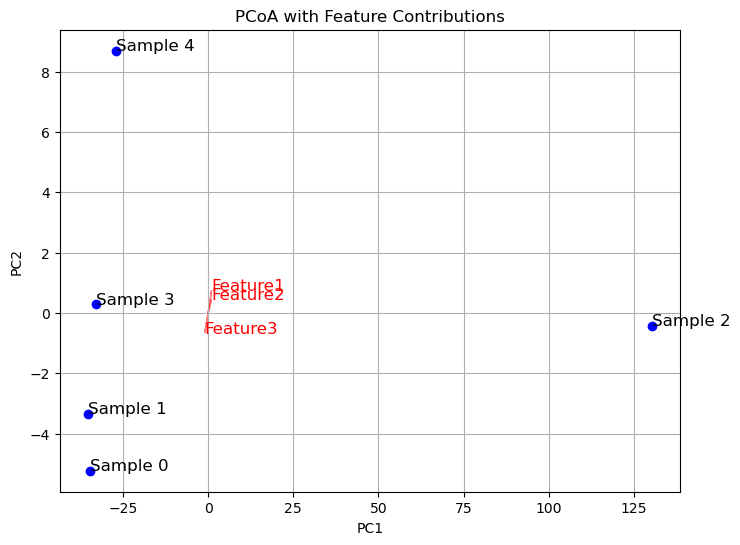

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from scipy.spatial.distance import pdist, squareform

# Sample data: Rows represent samples, columns represent features
data = pd.DataFrame({
    'Feature1': [1, 2, 80, 4, 9],
    'Feature2': [5, 4, 3, 1, 3],
    'Feature3': [2, 3, 4, 1, 5]
})
print(data)
# Step 1: Compute the distance matrix (Euclidean distance)
distance_matrix = pdist(data, metric='euclidean')

# Convert the 1D distance matrix to a square 2D distance matrix
distance_matrix_square = squareform(distance_matrix)

# Step 2: Perform PCoA (Principal Coordinates Analysis)
# Using PCA to perform PCoA on the distance matrix
pcoa_result = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
pcoa_coords = pcoa_result.fit_transform(distance_matrix_square)

# Step 3: Plot the PCoA result (samples in reduced space)
plt.figure(figsize=(8, 6))
plt.scatter(pcoa_coords[:, 0], pcoa_coords[:, 1], color='blue')

# Add labels to each point (samples)
for i, label in enumerate(data.index):
    plt.text(pcoa_coords[i, 0], pcoa_coords[i, 1], f"Sample {label}", fontsize=12)

# Step 4: Visualize Feature Contributions (Vectors)
# In PCA, the components represent the contribution of each feature to the principal component
feature_contributions = pcoa_result.components_

# Plot the vectors (feature contributions) as arrows
for i, feature in enumerate(data.columns):
    # Scale the arrows to make them more visible
    plt.arrow(0, 0, feature_contributions[0, i] * 2, feature_contributions[1, i] * 2,
              color='red', alpha=0.5, head_width=0.05, head_length=0.1)
    plt.text(feature_contributions[0, i] * 2.2, feature_contributions[1, i] * 2.2,
             feature, color='red', fontsize=12)

# Final plot settings
plt.title("PCoA with Feature Contributions")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()


In [37]:
from sklearn import datasets
wine_data = datasets.load_wine(as_frame=True)
df = wine_data.data

In [38]:
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [40]:
print(df.shape)


(178, 13)


In [143]:
df = pd.DataFrame({'feature1': [1, 2, 3, 4], 'feature2': [2, 5, 8, 22], 'feature3': [1.1, 1, 1, 1]})
df = pd.read_excel('max_strat4_relabunds_feb4.xlsx')

In [144]:
#ADDING ZEROES FOR EVERY TAXA THAT IS NOT PRESENT

df = df[['newName', 'FlowCamID', 'type', 'relabund']]
samples = df['FlowCamID'].unique()
all_taxa = df['newName'].unique()
print('all taxa: ', len(all_taxa))
all_taxa_set = set(all_taxa)
types = df['type'].unique()
for s, sample in enumerate(samples):
    sampledf = df[df['FlowCamID'] == sample]
    sample_taxa = sampledf['newName'].unique()
    sample_taxa_set = set(sample_taxa)
    missing_taxa = all_taxa_set - sample_taxa_set
    if len(missing_taxa) > 0:
        print('adding ', missing_taxa) 
    for taxa in missing_taxa:
        for type in types:
            new_row = {'newName': taxa, 'FlowCamID': sample, 'type': type, 'relabund': 0}
            df.loc[len(df)] = new_row  # Adds the row at the end of the DataFrame


    



all taxa:  56
adding  {'Microsetella spp.', 'Osteichthyes (larvae)', 'Cnidaria (larvae)', 'Amphipoda', 'Isopoda (larvae)', 'Ascidiacea (larvae)', 'Corycaeidae', 'Paracalanus spp.', 'Scyphozoa (larvae)', 'Chiridius spp.', 'Platyhelminthes/Nemertea (larvae)', 'Leuckartiara spp. (medusa)', 'Metridia spp.', 'Decapoda- brachyura (larvae)', 'Siphonophorae (nectophore)', 'Ctenophora (larvae)', 'Anthoathecata (medusa)', 'Tomopteris spp.', 'Euphysa spp. (medusa)', 'Pseudodiaptomus spp.', 'Labidocera spp.', 'Platyhelminthes/Nemertea (juvenile)', 'Epilabidocera spp.'}
adding  {'Microsetella spp.', 'Osteichthyes (larvae)', 'Cnidaria (larvae)', 'Amphipoda', 'Isopoda (larvae)', 'Ascidiacea (larvae)', 'Corycaeidae', 'Paracalanus spp.', 'Scyphozoa (larvae)', 'Chiridius spp.', 'Platyhelminthes/Nemertea (larvae)', 'Leuckartiara spp. (medusa)', 'Metridia spp.', 'Decapoda- brachyura (larvae)', 'Siphonophorae (nectophore)', 'Ctenophora (larvae)', 'Anthoathecata (medusa)', 'Tomopteris spp.', 'Euphysa spp. (

In [145]:
df

,newName,FlowCamID,type,relabund
0,Acartia spp.,21_10_05_NL_S1_Z17_0752_250,CI,0.351523
1,Acartia spp.,21_10_05_NL_S1_Z17_0752_250,HI,0.400632
2,Acartia spp.,21_10_05_NL_S1_Z17_0752_250,HM,0.402778
3,Acartia spp.,21_10_05_NL_S1_Z17_1406_250,CI,0.363532
4,Acartia spp.,21_10_05_NL_S1_Z17_1406_250,HI,0.390190
...,...,...,...,...
6715,Labidocera spp.,AMMP_PA_S04W20_20210610LT_250um,HI,0.000000
6716,Labidocera spp.,AMMP_PA_S04W20_20210610LT_250um,HM,0.000000
6717,Microsetella spp.,AMMP_PA_S04W20_20210610LT_250um,CI,0.000000
6718,Microsetella spp.,AMMP_PA_S04W20_20210610LT_250um,HI,0.000000


In [146]:
df['sampleType'] = df['type'] + '_' + df['FlowCamID']
df = df[['newName', 'sampleType', 'relabund']]
df

,newName,sampleType,relabund
0,Acartia spp.,CI_21_10_05_NL_S1_Z17_0752_250,0.351523
1,Acartia spp.,HI_21_10_05_NL_S1_Z17_0752_250,0.400632
2,Acartia spp.,HM_21_10_05_NL_S1_Z17_0752_250,0.402778
3,Acartia spp.,CI_21_10_05_NL_S1_Z17_1406_250,0.363532
4,Acartia spp.,HI_21_10_05_NL_S1_Z17_1406_250,0.390190
...,...,...,...
6715,Labidocera spp.,HI_AMMP_PA_S04W20_20210610LT_250um,0.000000
6716,Labidocera spp.,HM_AMMP_PA_S04W20_20210610LT_250um,0.000000
6717,Microsetella spp.,CI_AMMP_PA_S04W20_20210610LT_250um,0.000000
6718,Microsetella spp.,HI_AMMP_PA_S04W20_20210610LT_250um,0.000000


In [147]:
pivot_df = df.pivot(index='sampleType', columns='newName', values='relabund')


In [148]:
df = pivot_df

In [149]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 120 entries, CI_21_10_05_NL_S1_Z17_0752_250 to HM_AMMP_PA_S04W20_20210610LT_250um
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Acartia spp.                         120 non-null    float64
 1   Aglantha spp. (medusa)               120 non-null    float64
 2   Amphipoda                            120 non-null    float64
 3   Anthoathecata (medusa)               120 non-null    float64
 4   Ascidiacea (larvae)                  120 non-null    float64
 5   Bivalvia (larvae)                    120 non-null    float64
 6   Bryozoa (larvae)                     120 non-null    float64
 7   Calanoida (ci-ciii)                  120 non-null    float64
 8   Calanus spp.                         120 non-null    float64
 9   Centropages spp.                     120 non-null    float64
 10  Chaetognatha                         120 no

In [150]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
scaled_df = std_scaler.fit_transform(df)
taxa = df.columns.values
sampleTypes = df.index.values.tolist()

In [151]:
sampleTypes

['CI_21_10_05_NL_S1_Z17_0752_250',
 'CI_21_10_05_NL_S1_Z17_1406_250',
 'CI_21_10_05_NL_S1_Z41_0854_250',
 'CI_21_10_05_NL_S1_Z41_1327_250',
 'CI_21_10_06_NL_S1_Z17_0802_250',
 'CI_21_10_06_NL_S1_Z17_1442_250',
 'CI_21_10_06_NL_S1_Z41_0839_250',
 'CI_21_10_06_NL_S1_Z41_1412_250',
 'CI_21_10_07_NL_S1_Z17_0830_250',
 'CI_21_10_07_NL_S1_Z17_1459_250',
 'CI_AMMP_Gulf_StPeters_1_20200903HT_250UM',
 'CI_AMMP_Gulf_StPeters_1_20200903LT_250UM',
 'CI_AMMP_Gulf_StPeters_1_20200904HT_250UM',
 'CI_AMMP_Gulf_StPeters_2B_20200903_250UM',
 'CI_AMMP_Gulf_StPeters_2_20200903HT_250UM',
 'CI_AMMP_Gulf_StPeters_2_20200904HT_250UM',
 'CI_AMMP_Gulf_StPeters_3B_20200903_250UM',
 'CI_AMMP_Gulf_StPeters_3_20200903HT_250UM',
 'CI_AMMP_Gulf_StPeters_3_20200903LT_250UM',
 'CI_AMMP_Gulf_StPeters_3_20200904HT_250UM',
 'CI_AMMP_NL_S01_33_20200916AM_250UM',
 'CI_AMMP_NL_S01_33_20200916PM_250UM',
 'CI_AMMP_NL_S01_41_20200916AM_250UM',
 'CI_AMMP_NL_S01_41_20200916PM_250UM',
 'CI_AMMP_NL_S01_51_20200915PM_250UM',
 'CI_AM

In [152]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
coords = pca.fit_transform(scaled_df)

In [153]:
print(pca.components_)

[[-8.12607003e-02 -7.23768578e-02 -4.29859124e-03 -2.06393863e-02
   1.60820521e-02 -1.05030338e-02 -1.25691832e-01 -5.47927162e-02
  -9.74623811e-02 -5.08777133e-02 -1.09827696e-01 -3.29383008e-02
   2.88284930e-01 -1.64159071e-02 -5.71912243e-02  2.97962784e-01
   1.40704674e-01  2.68873914e-01  2.74758994e-01  1.17105995e-01
   4.73421109e-02 -3.94071707e-02 -8.04261171e-02  8.18862986e-02
  -7.90047515e-02 -1.58499629e-01 -2.56499754e-02  2.03285934e-01
   7.26566476e-02 -1.53121323e-01  5.04179510e-02  5.84734812e-02
  -7.78757618e-03  4.03739935e-02 -2.72991974e-02 -1.04654328e-01
  -1.27969512e-02 -2.50192138e-02 -3.87889563e-03  2.84422708e-01
  -9.03915416e-02 -1.22235800e-03  6.91727711e-02  2.97593901e-01
   4.40117998e-02  1.86007320e-01  1.62767446e-01  8.50899204e-02
  -1.81968237e-01 -3.96122805e-02 -8.83074892e-03  3.53252031e-02
   2.72066487e-01 -1.68341288e-01 -1.98478176e-02  2.36521931e-01]
 [-5.95457407e-02 -9.22915776e-02 -2.65521513e-02 -2.65873993e-02
   2.9686

In [154]:
print(sum(pca.explained_variance_ratio_))

0.27621981755524844


In [46]:
import numpy as np
nums = np.arange(14)

In [47]:
var_ratio = []
for num in nums:
  pca = PCA(n_components=num)
  pca.fit(scaled_df)
  var_ratio.append(np.sum(pca.explained_variance_ratio_))

Text(0.5, 1.0, 'n_components vs. Explained Variance Ratio')

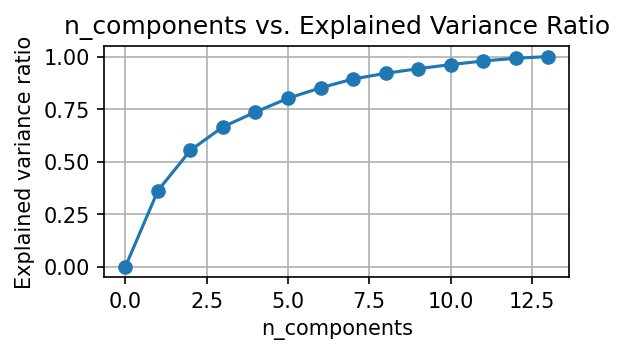

In [48]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4,2),dpi=150)
plt.grid()
plt.plot(nums,var_ratio,marker='o')
plt.xlabel('n_components')
plt.ylabel('Explained variance ratio')
plt.title('n_components vs. Explained Variance Ratio')

In [155]:
colors_by_type = {'CI':'green', 'HI':'orange', 'HM':'purple'}
markers_by_region = {'NL 2020': 'o', 'NL 2021': 'v', 'Pacific': 's', 'Gulf': 'D'}

In [156]:
sampleTypes

['CI_21_10_05_NL_S1_Z17_0752_250',
 'CI_21_10_05_NL_S1_Z17_1406_250',
 'CI_21_10_05_NL_S1_Z41_0854_250',
 'CI_21_10_05_NL_S1_Z41_1327_250',
 'CI_21_10_06_NL_S1_Z17_0802_250',
 'CI_21_10_06_NL_S1_Z17_1442_250',
 'CI_21_10_06_NL_S1_Z41_0839_250',
 'CI_21_10_06_NL_S1_Z41_1412_250',
 'CI_21_10_07_NL_S1_Z17_0830_250',
 'CI_21_10_07_NL_S1_Z17_1459_250',
 'CI_AMMP_Gulf_StPeters_1_20200903HT_250UM',
 'CI_AMMP_Gulf_StPeters_1_20200903LT_250UM',
 'CI_AMMP_Gulf_StPeters_1_20200904HT_250UM',
 'CI_AMMP_Gulf_StPeters_2B_20200903_250UM',
 'CI_AMMP_Gulf_StPeters_2_20200903HT_250UM',
 'CI_AMMP_Gulf_StPeters_2_20200904HT_250UM',
 'CI_AMMP_Gulf_StPeters_3B_20200903_250UM',
 'CI_AMMP_Gulf_StPeters_3_20200903HT_250UM',
 'CI_AMMP_Gulf_StPeters_3_20200903LT_250UM',
 'CI_AMMP_Gulf_StPeters_3_20200904HT_250UM',
 'CI_AMMP_NL_S01_33_20200916AM_250UM',
 'CI_AMMP_NL_S01_33_20200916PM_250UM',
 'CI_AMMP_NL_S01_41_20200916AM_250UM',
 'CI_AMMP_NL_S01_41_20200916PM_250UM',
 'CI_AMMP_NL_S01_51_20200915PM_250UM',
 'CI_AM

In [157]:
taxa

array(['Acartia spp.', 'Aglantha spp. (medusa)', 'Amphipoda',
       'Anthoathecata (medusa)', 'Ascidiacea (larvae)',
       'Bivalvia (larvae)', 'Bryozoa (larvae)', 'Calanoida (ci-ciii)',
       'Calanus spp.', 'Centropages spp.', 'Chaetognatha',
       'Chiridius spp.', 'Cirripedia (larvae)', 'Cnidaria (larvae)',
       'Copepoda (nauplii)', 'Corycaeidae', 'Ctenophora (larvae)',
       'Decapoda- brachyura (larvae)', 'Decapoda- non-brachyura (larvae)',
       'Echinodermata (larvae)', 'Epilabidocera spp.',
       'Euphausiacea (larvae)', 'Euphausiacea (nauplii)',
       'Euphysa spp. (medusa)', 'Eurytemora spp.', 'Evadne spp.',
       'Foraminifera', 'Fritillaria spp.', 'Gastropoda (larvae/Limacina)',
       'Harpacticoida- epibenthic', 'Hydrozoa (medusa)',
       'Isopoda (larvae)', 'Labidocera spp.',
       'Leuckartiara spp. (medusa)', 'Metridia spp.', 'Microcalanus spp.',
       'Microsetella spp.', 'Monstrillidae', 'Obelia spp. (medusa)',
       'Oikopleura spp.', 'Oithona spp.'

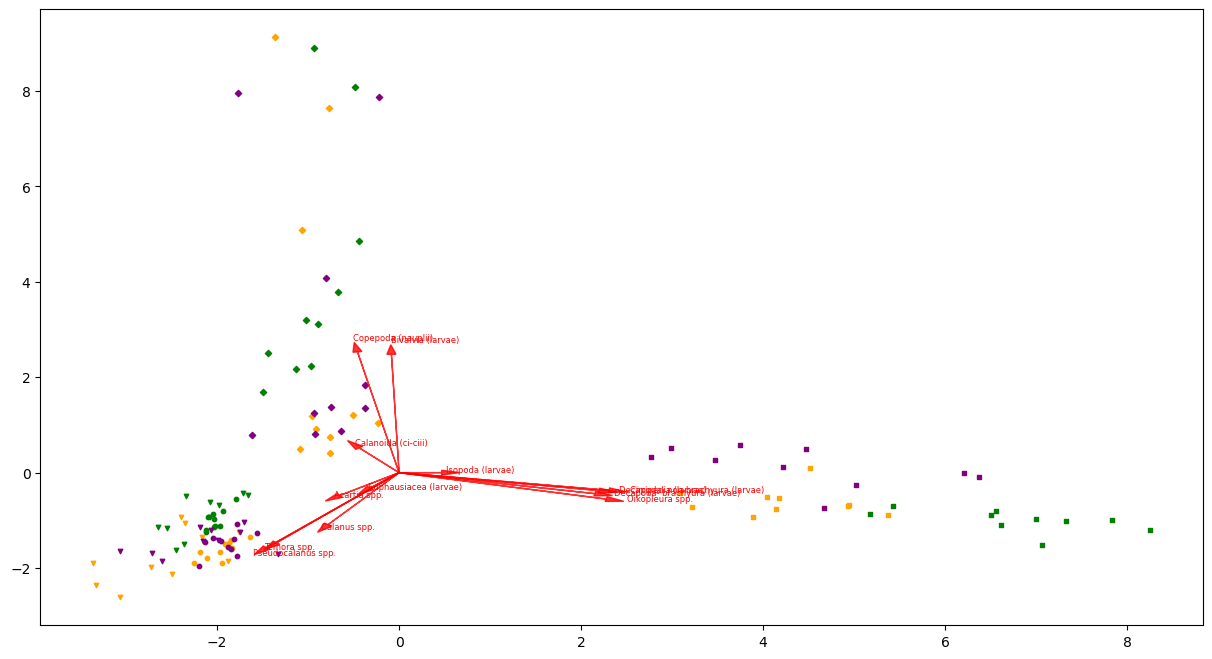

In [179]:
fig, axes = plt.subplots(figsize=(15, 8))
for c, coord in enumerate(coords):
    sampleType = sampleTypes[c]
    if '_PA_' in sampleType:
        region = 'Pacific'
    elif '_Gulf_' in sampleType:
        region = 'Gulf'
    elif '_NL_' in sampleType and '_2020' in sampleType:
        region = 'NL 2020'
    else:
        region = 'NL 2021'
    plt.scatter(coord[0], coord[1], color = colors_by_type[sampleType[:2]], marker=markers_by_region[region], s=10)
    component_coords = zip(pca.components_[0], pca.components_[1])
interesting_taxa = ['Acartia spp.', 'Bivalvia (larvae)', 'Temora spp.', 'Cirripedia (larvae)', 'Calanus spp.', 'Isopoda (larvae)', 'Pseudocalanus spp.', 'Oikopleura spp.',
                   'Calanoida (ci-ciii)', 'Copepoda (nauplii)', 'Decapoda- brachyura (larvae)', 'Decapoda- non-brachyura (larvae)', 'Euphausiacea (larvae)']
for c, component_coord in enumerate(component_coords):
    if taxa[c] in interesting_taxa:
        multiplier = 8
        plt.arrow(0, 0, component_coord[0] * multiplier, component_coord[1] * multiplier, color='red', alpha=0.8, head_width=0.1, head_length=0.2)
        plt.text(component_coord[0] * multiplier * 1.1, component_coord[1] * multiplier * 1.1,
                 taxa[c], color='red', fontsize=6)

# plt.legend()
plt.show()
plt.close()

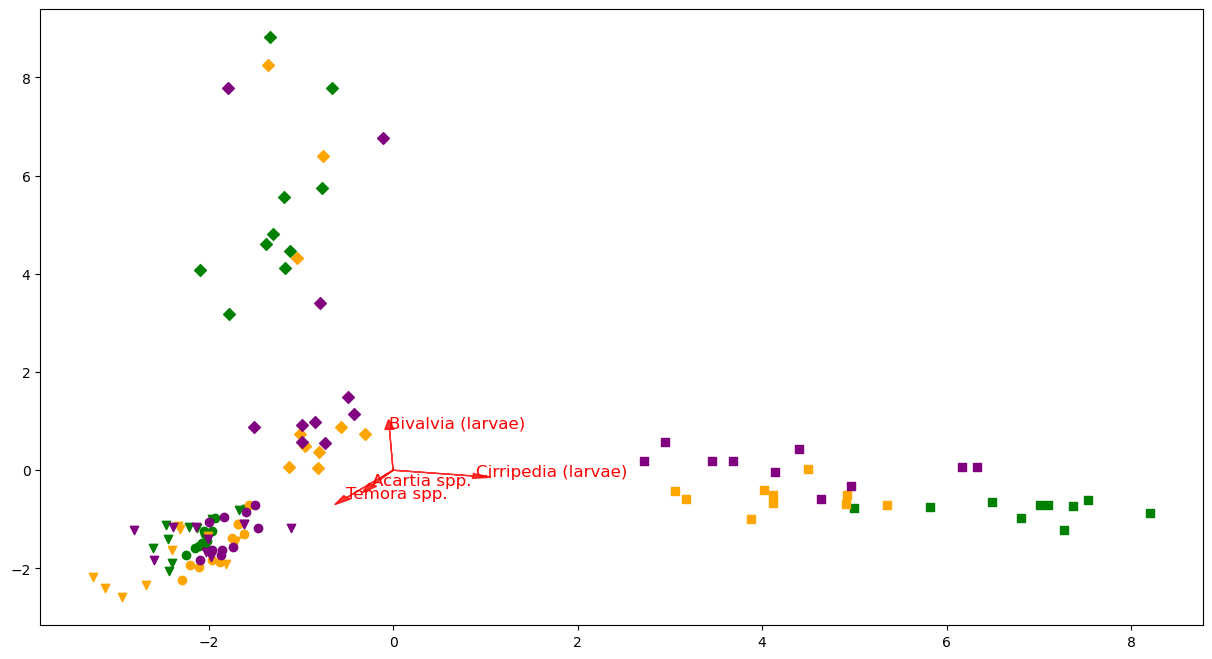

In [142]:
fig, axes = plt.subplots(figsize=(15, 8))
for c, coord in enumerate(coords):
    sampleType = sampleTypes[c]
    if '_PA_' in sampleType:
        region = 'Pacific'
    elif '_Gulf_' in sampleType:
        region = 'Gulf'
    elif '_NL_' in sampleType and '_2020' in sampleType:
        region = 'NL 2020'
    else:
        region = 'NL 2021'
    plt.scatter(coord[0], coord[1], color = colors_by_type[sampleType[:2]], marker=markers_by_region[region])
    component_coords = zip(pca.components_[0], pca.components_[1])
interesting_taxa = ['Acartia spp.', 'Bivalvia (larvae)', 'Temora spp.', 'Cirripedia (larvae)']
for c, component_coord in enumerate(component_coords):
    if taxa[c] in interesting_taxa:
        plt.arrow(0, 0, component_coord[0] * 3, component_coord[1] * 3, color='red', alpha=0.8, head_width=0.1, head_length=0.2)
        plt.text(component_coord[0] * 3.1, component_coord[1] * 3.1,
                 taxa[c], color='red', fontsize=12)

# plt.legend()
plt.show()
plt.close()

In [103]:
import pandas as pd

# Sample DataFrame
df = pd.DataFrame({
    'Date': ['2025-02-01', '2025-02-01', '2025-02-02', '2025-02-02'],
    'City': ['New York', 'Los Angeles', 'New York', 'Los Angeles'],
    'Temperature': [32, 75, 28, 70]
})

print(df)


         Date         City  Temperature
0  2025-02-01     New York           32
1  2025-02-01  Los Angeles           75
2  2025-02-02     New York           28
3  2025-02-02  Los Angeles           70


In [104]:
# Pivot the DataFrame
pivot_df = df.pivot(index='Date', columns='City', values='Temperature')

print(pivot_df)


City        Los Angeles  New York
Date                             
2025-02-01           75        32
2025-02-02           70        28
